# Numerical Algorithms

## Solving the Neutron Diffusion Equation in a Fissioning Nuclear Weapon

### Introduction

The Neutron Diffusion equation in a fissioning nuclear weapon, as introduced in _The Physics of the Manhattan Project_, is given by


$$
\frac{\partial N(\vec r, t)}{\partial t} = \frac{\nu_{neut}}{\lambda_f}N(\vec r, t) \ + \ \frac{\lambda_t \nu_{neut}}{3}(\nabla^2 N(\vec r, t)),
$$

where $N(\vec r, t)$ represents the neutron field $N$ at a position vector $\vec r$ at time $t$. The constants that appear in the equation are defined as:



In [1]:
%matplotlib ipympl

fig, ax = plt.subplots()
t = np.linspace(0, 3, 40)
g = -9.81
v0 = 12
z = g * t**2 / 2 + v0 * t

v02 = 5
z2 = g * t**2 / 2 + v02 * t

scat = ax.scatter(t[0], z[0], c="b", s=5, label=f'v0 = {v0} m/s')
line2 = ax.plot(t[0], z2[0], label=f'v0 = {v02} m/s')[0]
ax.set(xlim=[0, 3], ylim=[-4, 10], xlabel='Time [s]', ylabel='Z [m]')
ax.legend()


def update(frame):
    # for each frame, update the data stored on each artist.
    x = t[:frame]
    y = z[:frame]
    # update the scatter plot:
    data = np.stack([x, y]).T
    scat.set_offsets(data)
    # update the line plot:
    line2.set_xdata(t[:frame])
    line2.set_ydata(z2[:frame])
    return (scat, line2)


ani = animation.FuncAnimation(fig=fig, func=update, frames=40, interval=30)
plt.show()

NameError: name 'plt' is not defined

C:\Users\JingHao\AppData\Local\Temp\ipykernel_15496\542067274.py:18: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = FuncAnimation(fig, animate, interval=700)


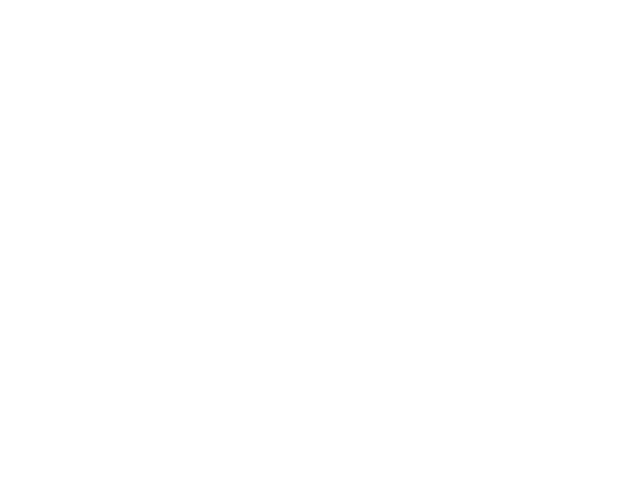

In [2]:
%matplotlib ipympl
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt

from itertools import count
import random

def animate(i, x=[], y=[]):
    plt.cla()
    x.append(i)
    y.append(random.randint(0, 10))
    plt.plot(x, y)



if __name__ == "__main__":
    fig = plt.figure()
    ani = FuncAnimation(fig, animate, interval=700)
    plt.show()

c:\Users\JingHao\anaconda3\lib\site-packages\matplotlib\animation.py:880: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


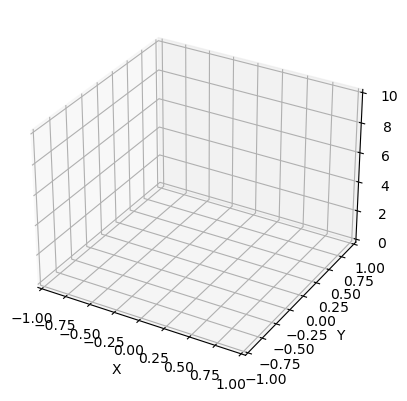

In [3]:
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

def gen(n):
    phi = 0
    while phi < 2*np.pi:
        yield np.array([np.cos(phi), np.sin(phi), phi])
        phi += 2*np.pi/n

def update(num, data, line):
    line.set_data(data[:2, :num])
    line.set_3d_properties(data[2, :num])

N = 100
data = np.array(list(gen(N))).T
line, = ax.plot(data[0, 0:1], data[1, 0:1], data[2, 0:1])

# Setting the axes properties
ax.set_xlim3d([-1.0, 1.0])
ax.set_xlabel('X')

ax.set_ylim3d([-1.0, 1.0])
ax.set_ylabel('Y')

ax.set_zlim3d([0.0, 10.0])
ax.set_zlabel('Z')

ani = animation.FuncAnimation(fig, update, N, fargs=(data, line), interval=10000/N, blit=False)
#ani.save('matplot003.gif', writer='imagemagick')
plt.show()

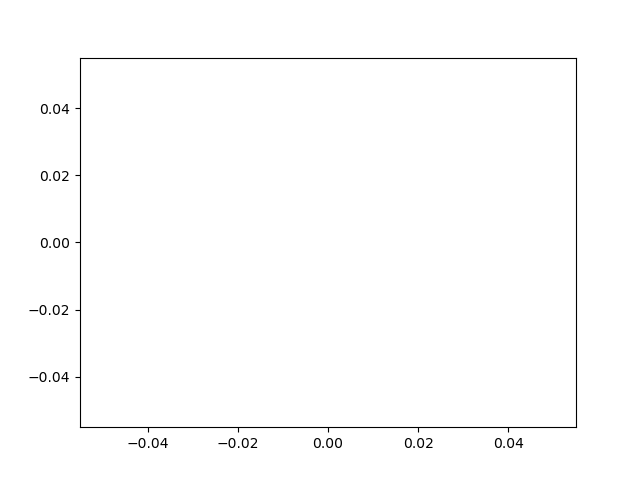

In [1]:
%matplotlib ipympl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

# Sample data for the arrays
A1_X = np.array([1, 2, 3, 4, 5])
A1_Y = np.array([1, 4, 9, 16, 25])

A2_X = np.array([1, 2, 3, 4, 5])
A2_Y = np.array([2, 3, 5, 7, 11])

A3_X = np.array([1, 2, 3, 4, 5])
A3_Y = np.array([5, 7, 10, 15, 21])

# Combine all arrays into a list of tuples
arrays = [(A1_X, A1_Y), (A2_X, A2_Y), (A3_X, A3_Y)]

fig, ax = plt.subplots()
line, = ax.plot([], [], 'bo-', lw=2)

def init():
    ax.set_xlim(0, 6)
    ax.set_ylim(0, 30)
    line.set_data([], [])
    return line,

def update(frame):
    X, Y = arrays[frame]
    line.set_data(X, Y)
    return line,

ani = animation.FuncAnimation(fig, update, frames=len(arrays), init_func=init, blit=True, interval=1000)

plt.show()


In [4]:
import numpy as np

L = 10
nx = 100

x = np.linspace(0, L, nx)
u0 = np.exp(-((x - L / 2)**2) / (2 * 0.1**2))